In [27]:
%matplotlib widget

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
from scipy.integrate import simpson

In [2]:
plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 1.6

In [40]:
df = pd.read_csv("Deuteron/deuteron_all_data.csv")
df_exp = pd.read_csv("./Deuteron/deuteron_exp_diffcross.csv")
df_exp_tot = pd.read_csv("./Deuteron/deuteron_exp_totcross.csv")

In [14]:
observables = [ob for ob in df.columns.values if ob not in ["THCM", "angle", "CUTOFF", "FORCE"]]

In [15]:
print(observables)

['CROSS', 'CROSS2', 'P1', 'P2', 'PHIP', 'WAVE', 'T11D', 'T20D', 'T21D', 'T22D', 'T11D2', 'T20D2', 'T21D2', 'T22D2', 'AX', 'AY', 'AZ', 'AX2', 'AY2', 'AZ2', 'POLNOUT(y)', 'POLNOUT2(y)', 'CROSSCAP', 'CROSSCAP2', 'AYN1CAP', 'AYN1CAP2', 'Energy']


In [16]:
FORCES=["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]
CUTOFF=[400,450,500,550]

In [41]:
line_styles = {"LO": {"marker":"d", "markevery": 10, "markersize": 3, "color": "tab:orange"},
               "NLO": {"marker":".", "markevery": 10, "color": "tab:blue"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "tab:green"},
               "N3LO": {"ls": "dotted", "color": "tab:red"},
               "N4LO": {"color": "black"},
               "N4LO+": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "tab:cyan"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "tab:pink"}
              }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"], 
            }

exp_style = [
    {"fmt": "ok"},
    {"fmt": "ok", "markerfacecolor":"None", "markeredgecolor": "k"},
    {"fmt": "sk"},
    {"fmt": "^k"},
    {"fmt": "Xk"},
    {"fmt": "d", "color": "magenta"},
]

marker_common = {"markersize": 6, "elinewidth": 0.9, "capsize": 2.5}


# Differential Cross Section

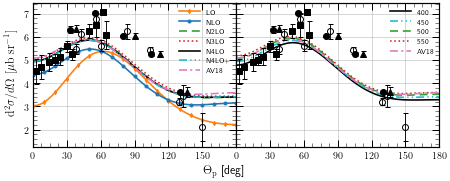

In [18]:
obs="CROSS2"
ylabel="$\mathrm{d}^2\sigma / d \Omega ~[\mu\mathrm{b~sr}^{-1}]$"
energy=100

# fig, axes = plt.subplots(1,2, figsize=(6.5, 2.8))
fig = plt.figure(figsize=(6.5, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
axes = gs.subplots(sharey=True)
fig.supxlabel("$\Theta_\mathrm{p}$ [deg]", y=0.08, size=12)
fig.supylabel(ylabel, x=0.03, y=0.6, size=12)
for force in FORCES:
    df_tmp = df[(df.FORCE == force) & (df.CUTOFF == 450) & (df.Energy == energy) & (df.WAVE == "SIEGERT")]
    axes[0].plot(df_tmp.angle, df_tmp[obs],
                 **line_styles[force], label = force)
for cutoff in CUTOFF:
    df_tmp = df[(df.FORCE == "N4LO+") & (df.CUTOFF == cutoff) & (df.Energy == energy) & (df.WAVE == "SIEGERT")]
    axes[1].plot(df_tmp.angle, df_tmp[obs],
                 **ls_cutoff[cutoff], label = cutoff)
df_av18 = df[(df.FORCE == "AV18") & (df.Energy == energy)]
for j,ax in enumerate(axes):
    ax.plot(df_av18.angle, df_av18[obs],
                 **line_styles["AV18"], label = "AV18")
    for i, fname in enumerate(df_exp[df_exp.energy == energy].fname.unique()):
        df_tmp = df_exp[(df_exp.energy == energy) & (df_exp.fname == fname)]
        ax.errorbar(df_tmp.angle, df_tmp.CROSS,
                    yerr=df_tmp.error, zorder=3, **exp_style[i], **marker_common)
    # style
    ax.legend(fontsize=7, handlelength=3)
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    ax.set_xticks(np.arange(0, 180+j, 30))
    ax.set_xlim([0,180])
    ax.grid()
# plt.subplots_adjust(wspace = 0.001)
fig.tight_layout()
plt.savefig(f"Figures_python/{obs}_{energy}mev.pdf", dpi=600, facecolor="white")
plt.show()


# Total Cross Section

In [42]:
energies = df.Energy.unique()
energies.sort()
energies

array([ 10,  20,  25,  30,  40,  45,  50,  60,  70,  80,  90, 100, 110,
       120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240,
       250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370,
       380, 390, 400])

In [43]:
df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.Energy == 30) &
                (df.WAVE == "SIEGERT")]

In [44]:
CROSS_TOT = []
for energy in tqdm(energies):
    df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.Energy == energy) &
                (df.WAVE == "SIEGERT")]
    x = df_tmp.THCM.values
    y = df_tmp.CROSS2.values*np.sin(x)
    CROSS_TOT.append(2*np.pi*simpson(y,x=x))

100%|██████████| 42/42 [00:00<00:00, 83.76it/s]


In [45]:
CROSS_TOT = np.array(CROSS_TOT)

/tmp/ipykernel_3362056/3534131879.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,4))


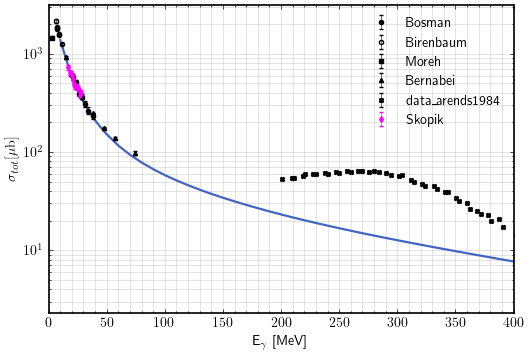

In [60]:
plt.figure(figsize=(6,4))
# plt.figure(figsize=(6.5, 2.8))
plt.plot(energies, CROSS_TOT)
marker_common_tmp = {"markersize": 3, "elinewidth": 0.4, "capsize": 1.5}
for i, fname in enumerate(df_exp_tot.fname.unique()):
    df_tmp = df_exp_tot[df_exp_tot.fname == fname]
    plt.errorbar(df_tmp.E, df_tmp.TOTCROSS, yerr=df_tmp.ERR,
    label=fname.split(".")[0].rstrip("data_"),**exp_style[i],**marker_common_tmp)
plt.yscale("log")
plt.ylabel("$\sigma_{tot}[\mu \mathrm{b}]$")
plt.xlabel("E$_\gamma$ [MeV]")
plt.legend()
plt.xlim([0,400])
plt.grid(which='both', alpha=0.5)
plt.savefig(f"Figures_python/TOTAL_CROSSSECTION.pdf", dpi=600, facecolor="white")
plt.show()

# Tensor analyzing power

## Energy distribution

In [130]:
df_raczek_T20 = pd.read_csv("Deuteron/ExpData/raczek_mishev_T20.csv", header=None, skiprows=2,
                        names=["raczek_X", "raczek_Y", "raczek_errX", "raczek_errY",
                               "mishev_X", "mishev_Y", "mishev_errX", "mishev_errY"])
df_raczek_T20["raczek_err"] = df_raczek_T20["raczek_errY"] - df_raczek_T20["raczek_Y"]
df_raczek_T20["mishev_err"] = df_raczek_T20["mishev_errY"] - df_raczek_T20["mishev_Y"]

df_arenh_T20 = pd.read_csv("Deuteron/ExpData/arenhovel_T20.csv", header=None,
                        names=["energy", "T20"])

df_raczek_T22 = pd.read_csv("Deuteron/ExpData/raczek_mishev_T22.csv", header=None, skiprows=2,
                        names=["raczek_X", "raczek_Y", "raczek_errX", "raczek_errY",
                               "mishev_X", "mishev_Y", "mishev_errX", "mishev_errY"])
df_raczek_T22["raczek_err"] = df_raczek_T22["raczek_errY"] - df_raczek_T22["raczek_Y"]
df_raczek_T22["mishev_err"] = df_raczek_T22["mishev_errY"] - df_raczek_T22["mishev_Y"]

df_arenh_T22 = pd.read_csv("Deuteron/ExpData/arenhovel_T22.csv", header=None,
                        names=["energy", "T22"])

In [131]:
df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.angle == 88) &
                (df.WAVE == "SIEGERT")]
df_tmp = df_tmp.sort_values("Energy")

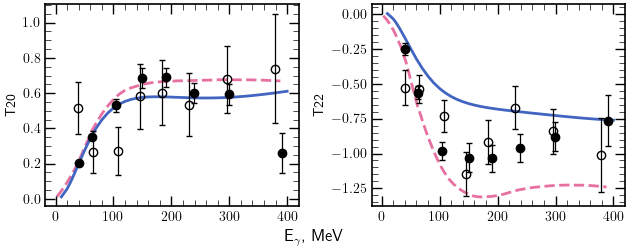

In [135]:
fig, ax = plt.subplots(1,2, figsize=(6.5, 2.8))
fig.supxlabel("E$_\gamma$, MeV", y=0.08, size=12)

ax[0].plot(df_tmp.Energy, df_tmp.T20D2, label="N4LO+", zorder=2, lw=2)
ax[0].plot(df_arenh_T20.energy, df_arenh_T20.T20, label="arenhovel", ls="dashed", zorder=1, lw=2)
ax[0].errorbar(df_raczek_T20.raczek_X, df_raczek_T20.raczek_Y, yerr=df_raczek_T20.raczek_err,
               zorder=3, label="Rachek et al", **exp_style[0], **marker_common)
ax[0].errorbar(df_raczek_T20.mishev_X, df_raczek_T20.mishev_Y, yerr=df_raczek_T20.mishev_err,
               zorder=3, label="Mishev et al", **exp_style[1], **marker_common)
# ax[0].legend(fontsize=6)
ax[0].tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
ax[0].tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
ax[0].set_ylabel("T20")

ax[1].plot(df_tmp.Energy, df_tmp.T22D2, label="N4LO+", zorder=2, lw=2)
ax[1].plot(df_arenh_T22.energy, df_arenh_T22.T22, label="arenhovel", ls="dashed", zorder=1, lw=2)
ax[1].errorbar(df_raczek_T22.raczek_X, df_raczek_T22.raczek_Y, yerr=df_raczek_T22.raczek_err,
               zorder=3, label="Rachek et al", **exp_style[0], **marker_common)
ax[1].errorbar(df_raczek_T22.mishev_X, df_raczek_T22.mishev_Y, yerr=df_raczek_T22.mishev_err,
               zorder=3, label="Mishev et al", **exp_style[1], **marker_common)
# ax[1].legend(fontsize=6)
ax[1].tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
ax[1].tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
ax[1].set_ylabel("T22", x=20)
# plt.ylabel(

fig.tight_layout()
plt.savefig(f"Figures_python/T20_T22_vs_en.pdf", dpi=600, facecolor="white")
plt.show()

## Angular distribution

In [136]:
rachek_angular = pd.read_csv("Deuteron/ExpData/rachek_t2i_vs_theta.txt", delim_whitespace=True,
                             names=["Emin", "Emax", "Emean", "THmin", "THmax", "THmean",
                                   "T20", "T20stater", "T20syser", "T21", "T21stater", "T21syser",
                                   "T22", "T22stater", "T22syser"])
rachek_angular["THerr"] = rachek_angular.THmean - rachek_angular.THmin

In [137]:
espans = list(map(lambda x: list(map(lambda x: int(float(x)), x.split())), (rachek_angular.Emin.astype(str) + " " + rachek_angular.Emax.astype(str)).unique()))

In [138]:
espans

[[25, 45],
 [45, 70],
 [70, 100],
 [100, 140],
 [140, 180],
 [180, 230],
 [230, 330],
 [330, 440]]

In [139]:
espan = [230, 330]

In [140]:
df_tmp = df[(df.FORCE == "N4LO+") &
                    (df.CUTOFF == 450) &
                    (df.Energy >=espan[0]) &
                    (df.Energy <= espan[1]) &
                    (df.WAVE == "SIEGERT")]
df_1nc = df[(df.FORCE == "N4LO+") &
                    (df.CUTOFF == 450) &
                    (df.Energy >=espan[0]) &
                    (df.Energy <= espan[1]) &
                    (df.WAVE == "1NC")]
df_exp = rachek_angular[(rachek_angular.Emin==espan[0]) & (rachek_angular.Emax==espan[1])]

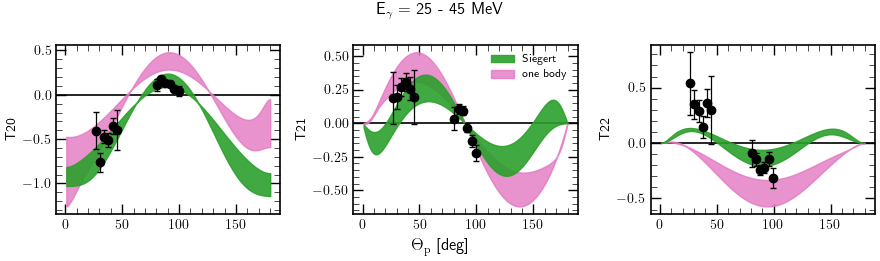

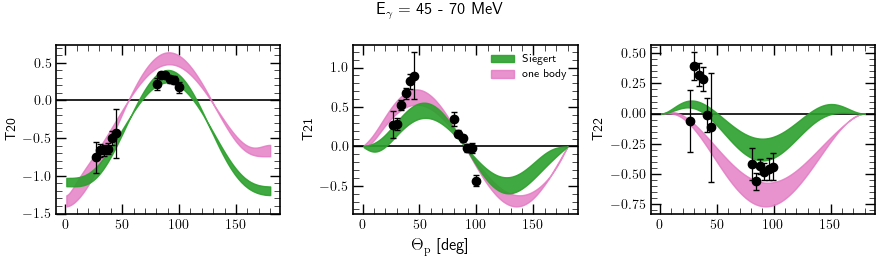

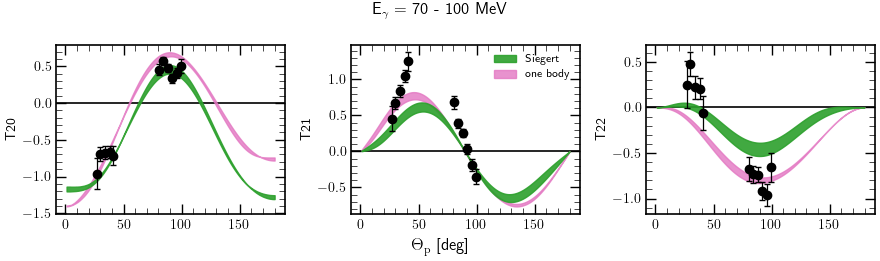

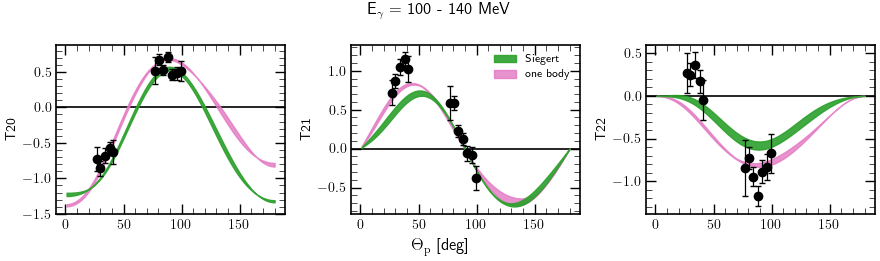

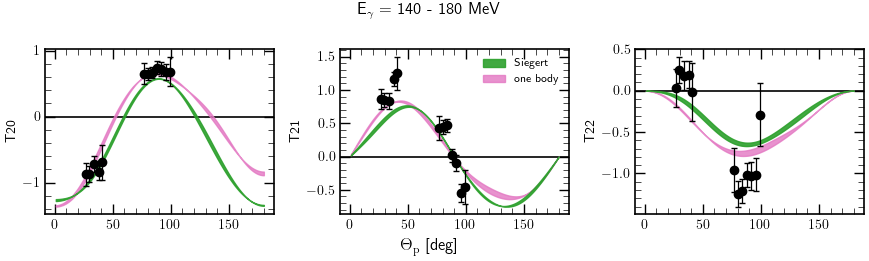

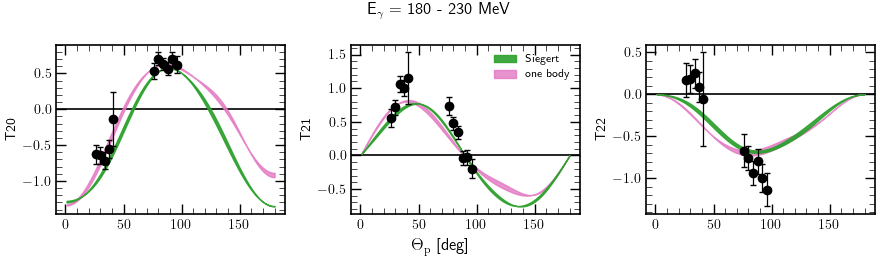

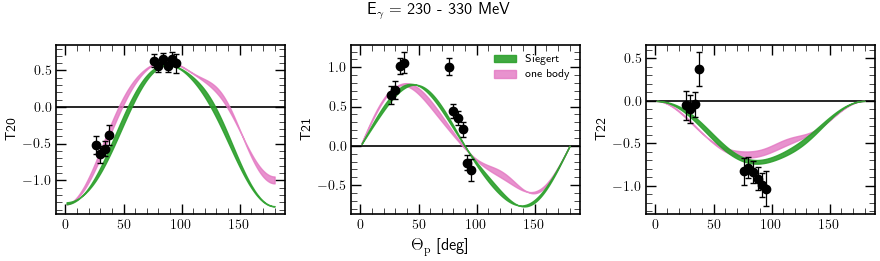

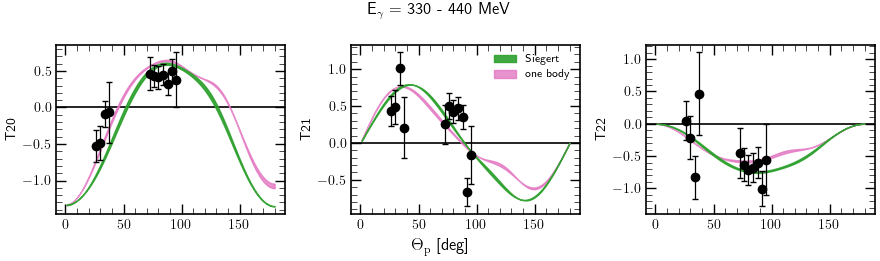

In [142]:
for espan in espans:
    df_tmp = df[(df.FORCE == "N4LO+") &
                    (df.CUTOFF == 450) &
                    (df.Energy >=espan[0]) &
                    (df.Energy <= espan[1]) &
                    (df.WAVE == "SIEGERT")]
    df_1nc = df[(df.FORCE == "N4LO+") &
                        (df.CUTOFF == 450) &
                        (df.Energy >=espan[0]) &
                        (df.Energy <= espan[1]) &
                        (df.WAVE == "1NC")]
    df_exp = rachek_angular[(rachek_angular.Emin==espan[0]) & (rachek_angular.Emax==espan[1])]
    fig, ax = plt.subplots(1,3, figsize=(9, 2.8))
    fig.suptitle("E$_\gamma$ = {} - {} MeV".format(*espan))
    fig.supxlabel("$\Theta_\mathrm{p}$ [deg]", y=0.08, size=12)
    # fig.supylabel(ylabel, x=0.03, y=0.6, size=12)

    for i, obs in enumerate(["T20", "T21", "T22"]):

        # Siegert
        df_gr = df_tmp.groupby("angle")[obs+"D2"].agg(['min', 'max']).reset_index()
        ax[i].fill_between(x="angle", y1="min", y2="max", data=df_gr,
                        color="tab:green", zorder=3, alpha=0.9, label="Siegert")
        # SN current
        df_gr_1nc = df_1nc.groupby("angle")[obs+"D2"].agg(['min', 'max']).reset_index()
        ax[i].fill_between(x="angle", y1="min", y2="max", data=df_gr_1nc,
                        color="tab:pink", zorder=2, alpha=0.8, label="one body")
        # experiment
        ax[i].errorbar(x="THmean", y=obs, yerr=obs + "stater", data=df_exp,
                       zorder=4, label=None, **exp_style[0], **marker_common)

        # style
        ax[i].axhline(c="k", zorder=1, lw=1.2)
        ax[i].set_ylabel(obs)
        # ax[i].yaxis.set_label_coords(-0.15, 0.5)
        ax[i].tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
        ax[i].tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    ax[1].legend(fontsize=8)
    fig.tight_layout()
    plt.savefig("Figures_python/Tensor_analyzing_power_angular_E{}-{}.pdf".format(*espan), dpi=600, facecolor="white")
    plt.show()

## Integrated

In [37]:
energies = df.Energy.unique()

In [38]:
energies.sort()

In [39]:
energies

array([ 10,  20,  25,  30,  40,  45,  50,  60,  70,  80,  90, 100, 110,
       120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240,
       250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370,
       380, 390, 400])

In [92]:
rachek_bins = pd.read_csv("Deuteron/ExpData/rachek_t2i_vs_theta.txt", delim_whitespace=True,
                             names=["Emin", "Emax", "Emean", "THmin", "THmax", "THmean",
                                   "T20", "T20stater", "T20syser", "T21", "T21stater", "T21syser",
                                   "T22", "T22stater", "T22syser"])
# rachek_bins["THerr"] = rachek_angular.THmean - rachek_angular.THmin

In [93]:
rachek_bins.head(6)

,Emin,Emax,Emean,THmin,THmax,THmean,T20,T20stater,T20syser,T21,T21stater,T21syser,T22,T22stater,T22syser
0,25.0,45.0,37.8,24.0,28.0,26.7,-0.406,0.207,0.041,0.185,0.193,0.035,0.538,0.281,0.043
1,25.0,45.0,37.9,28.0,32.0,30.3,-0.760,0.108,0.065,0.195,0.090,0.039,0.349,0.133,0.028
2,25.0,45.0,37.3,32.0,36.0,34.1,-0.474,0.074,0.044,0.273,0.067,0.040,0.286,0.098,0.023
3,25.0,45.0,37.0,36.0,40.0,37.9,-0.510,0.074,0.045,0.308,0.069,0.042,0.147,0.099,0.013
4,25.0,45.0,36.7,40.0,44.0,41.7,-0.354,0.087,0.033,0.256,0.085,0.041,0.363,0.125,0.029
5,25.0,45.0,36.1,44.0,48.0,45.1,-0.399,0.226,0.035,0.196,0.203,0.039,0.297,0.307,0.025


In [97]:
res = []
for en in rachek_bins.Emin.unique():
    df_tmp = rachek_bins[(rachek_bins.Emin == en) & (rachek_bins.THmin >= 24) & (rachek_bins.THmax <= 48)]
    # res.append(simpson(df_tmp.T21*df_tmp.THmean, df_tmp.THmean))
    res.append(np.sum(df_tmp.T21*(df_tmp.THmax - df_tmp.THmin))/ \
                (df_tmp.THmax.max() - df_tmp.THmin.min()))

In [41]:
res

[-0.48383333333333334,
 -0.6085,
 -0.742,
 -0.6924,
 -0.8,
 -0.5366,
 -0.52825,
 -0.29075]

In [119]:
val_min = []
val_max = []
val_mean = []
val_min_sieg = []
val_max_sieg = []
val_mean_sieg = []
for energy in tqdm(energies):
    df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.Energy == energy) &
                (df.WAVE == "1NC") &
                (df.angle >= 70) &
                (df.angle <= 102)]
    x = df_tmp.THCM.values
    y = df_tmp.T20D2.values
    # itegrated.append(2*np.pi*simpson(y,x=x))
    val_min.append(np.min(y))
    val_max.append(np.max(y))
    val_mean.append(np.mean(y))
    df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.Energy == energy) &
                (df.WAVE == "SIEGERT") &
                (df.angle >= 70) &
                (df.angle <= 102)]
    x = df_tmp.THCM.values
    y = df_tmp.T20D2.values
    # itegrated.append(2*np.pi*simpson(y,x=x))
    val_min_sieg.append(np.min(y))
    val_max_sieg.append(np.max(y))
    val_mean_sieg.append(np.mean(y))

100%|██████████| 42/42 [00:00<00:00, 139.24it/s]


In [53]:
df_url = pd.read_html("https://www.inp.nsk.su/~rachek/pn_files/t2i_vs_egamma.html")
cols = df_url[0].iloc[0].str.split().apply(lambda x: x[0]) + "_" + df_url[0].iloc[1].str.replace(".", "").str.replace(" ", "_")

In [85]:
df_url = pd.read_html("https://www.inp.nsk.su/~rachek/pn_files/t2i_vs_egamma.html", skiprows=2)[0]
df_url.columns = cols
df_url = df_url[df_url["E-gamma_start"] <400]

In [86]:
Eerr=np.array(list(zip(df_url["E-gamma_end"]-df_url["E-gamma_mean"], df_url["E-gamma_mean"]-df_url["E-gamma_start"])))

In [89]:
val_min[0], val_max[0], val_mean[0]

(-0.2023, -0.1054, -0.15703199999999998)

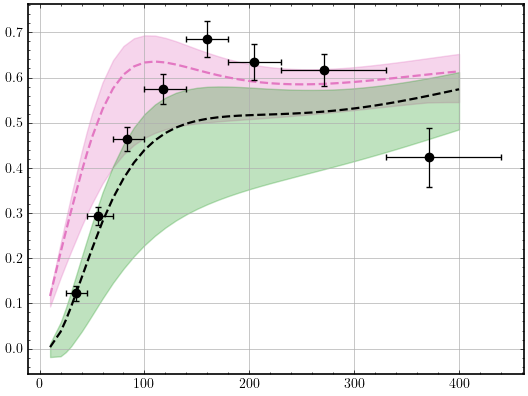

In [120]:
plt.figure()
plt.fill_between(energies, val_min, val_max, alpha=0.3, color="tab:pink", zorder=1)
plt.plot(energies, val_mean, color="tab:pink", ls="dashed",  zorder=2)
plt.fill_between(energies, val_min_sieg, val_max_sieg, alpha=0.3, color="tab:green", zorder=1)
plt.plot(energies, val_mean_sieg, color="k", ls="dashed",  zorder=2)
plt.errorbar(x="E-gamma_mean", y="T20_value", yerr="T20_stat_err",
xerr=Eerr[np.where((df_url["Theta-p_start"]>=70) & (df_url["Theta-p_end"]<=102))].T[::-1],
            data=df_url[(df_url["Theta-p_start"]>=70) & (df_url["Theta-p_end"]<=102)], zorder=2,
             **exp_style[0], **marker_common)
plt.grid()
plt.show()